In [0]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec, colors
import matplotlib.cm as cm

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten, Reshape, BatchNormalization, Activation, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras import backend as K

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
def simple_threshold(im, threshold=.5):
    return ((im > threshold)).astype("float32")

In [0]:
batch_size = 128
epochs = 58

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


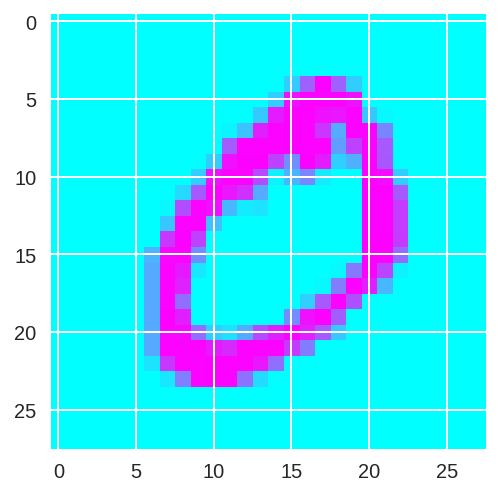

In [5]:
plt.imshow(x_train[1], cmap="cool")

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [30]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
# model.add(Dense(512, activation='sigmoid'))
model.add(Dense(248, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(56, activation='sigmoid'))
# ----------------------------------------
model.add(Dense(2, activation='sigmoid'))
# ----------------------------------------
model.add(Dense(56, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(248, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
# model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(784, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 248)               127224    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               31872     
_________________________________________________________________
dense_16 (Dense)             (None, 56)                7224      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 114       
_________________________________________________________________
dense_18 (Dense)             (None, 56)                168       
_________________________________________________________________
dense_19 (Dense)             (None, 128)               7296      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['mse', 'mae'])

In [55]:
history = model.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/58
60000/60000 [==============================] - 6s 107us/step - loss: 565.1647 - mean_squared_error: 0.0524 - mean_absolute_error: 0.1127 - val_loss: 572.4783 - val_mean_squared_error: 0.0512 - val_mean_absolute_error: 0.1120
Epoch 2/58
60000/60000 [==============================] - 6s 92us/step - loss: 564.3598 - mean_squared_error: 0.0507 - mean_absolute_error: 0.1110 - val_loss: 571.9474 - val_mean_squared_error: 0.0505 - val_mean_absolute_error: 0.1108
Epoch 3/58
60000/60000 [==============================] - 6s 93us/step - loss: 564.1854 - mean_squared_error: 0.0508 - mean_absolute_error: 0.1110 - val_loss: 572.1572 - val_mean_squared_error: 0.0508 - val_mean_absolute_error: 0.1107
Epoch 4/58
60000/60000 [==============================] - 6s 93us/step - loss: 563.8256 - mean_squared_error: 0.0499 - mean_absolute_error: 0.1101 - val_loss: 571.4773 - val_mean_squared_error: 0.0488 - val_mean_absolute_error: 0.1094
Epoch 5/5

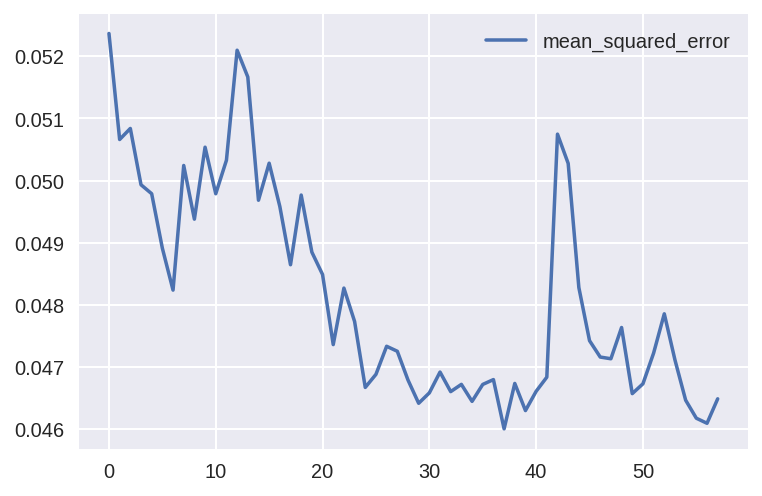

In [57]:
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
# plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.legend()

In [0]:
pred = model.predict(x_train)

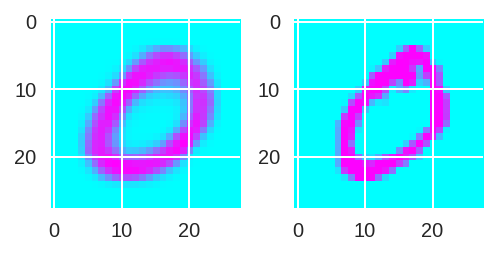

In [64]:
k = 1
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(4, 1,1)
plt.imshow(x_train[k].reshape(28, 28),cmap="cool")
fig.add_subplot(4, 2,1)
plt.imshow(pred[k].reshape(28, 28),cmap="cool")
plt.show()

In [0]:
from keras import backend as K
get_image = K.function([model.layers[5].input, K.learning_phase()],
                           [model.layers[-1].output])

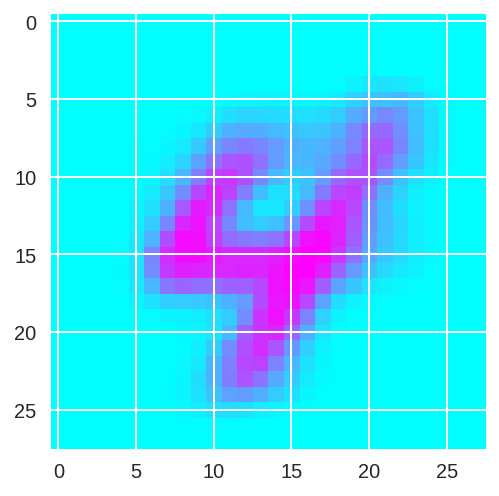

In [66]:
vector = np.array([0.8, .3]).reshape(1,2)
h1 = get_image([vector])[0]
plt.imshow(h1.reshape(28, 28), cmap="cool")

In [0]:
images = [0]*10
vectors = [0]*10
for i in range(10):
    images[i] = [0]*10
    vectors[i] = [0]*10
for f in range(10):
    for j in range(10):
        vectors[f][j] = np.array([f/10, j/10])
        images[f][j] = get_image([vectors[f][j].reshape(-1,2)])[0].reshape(28, 28)

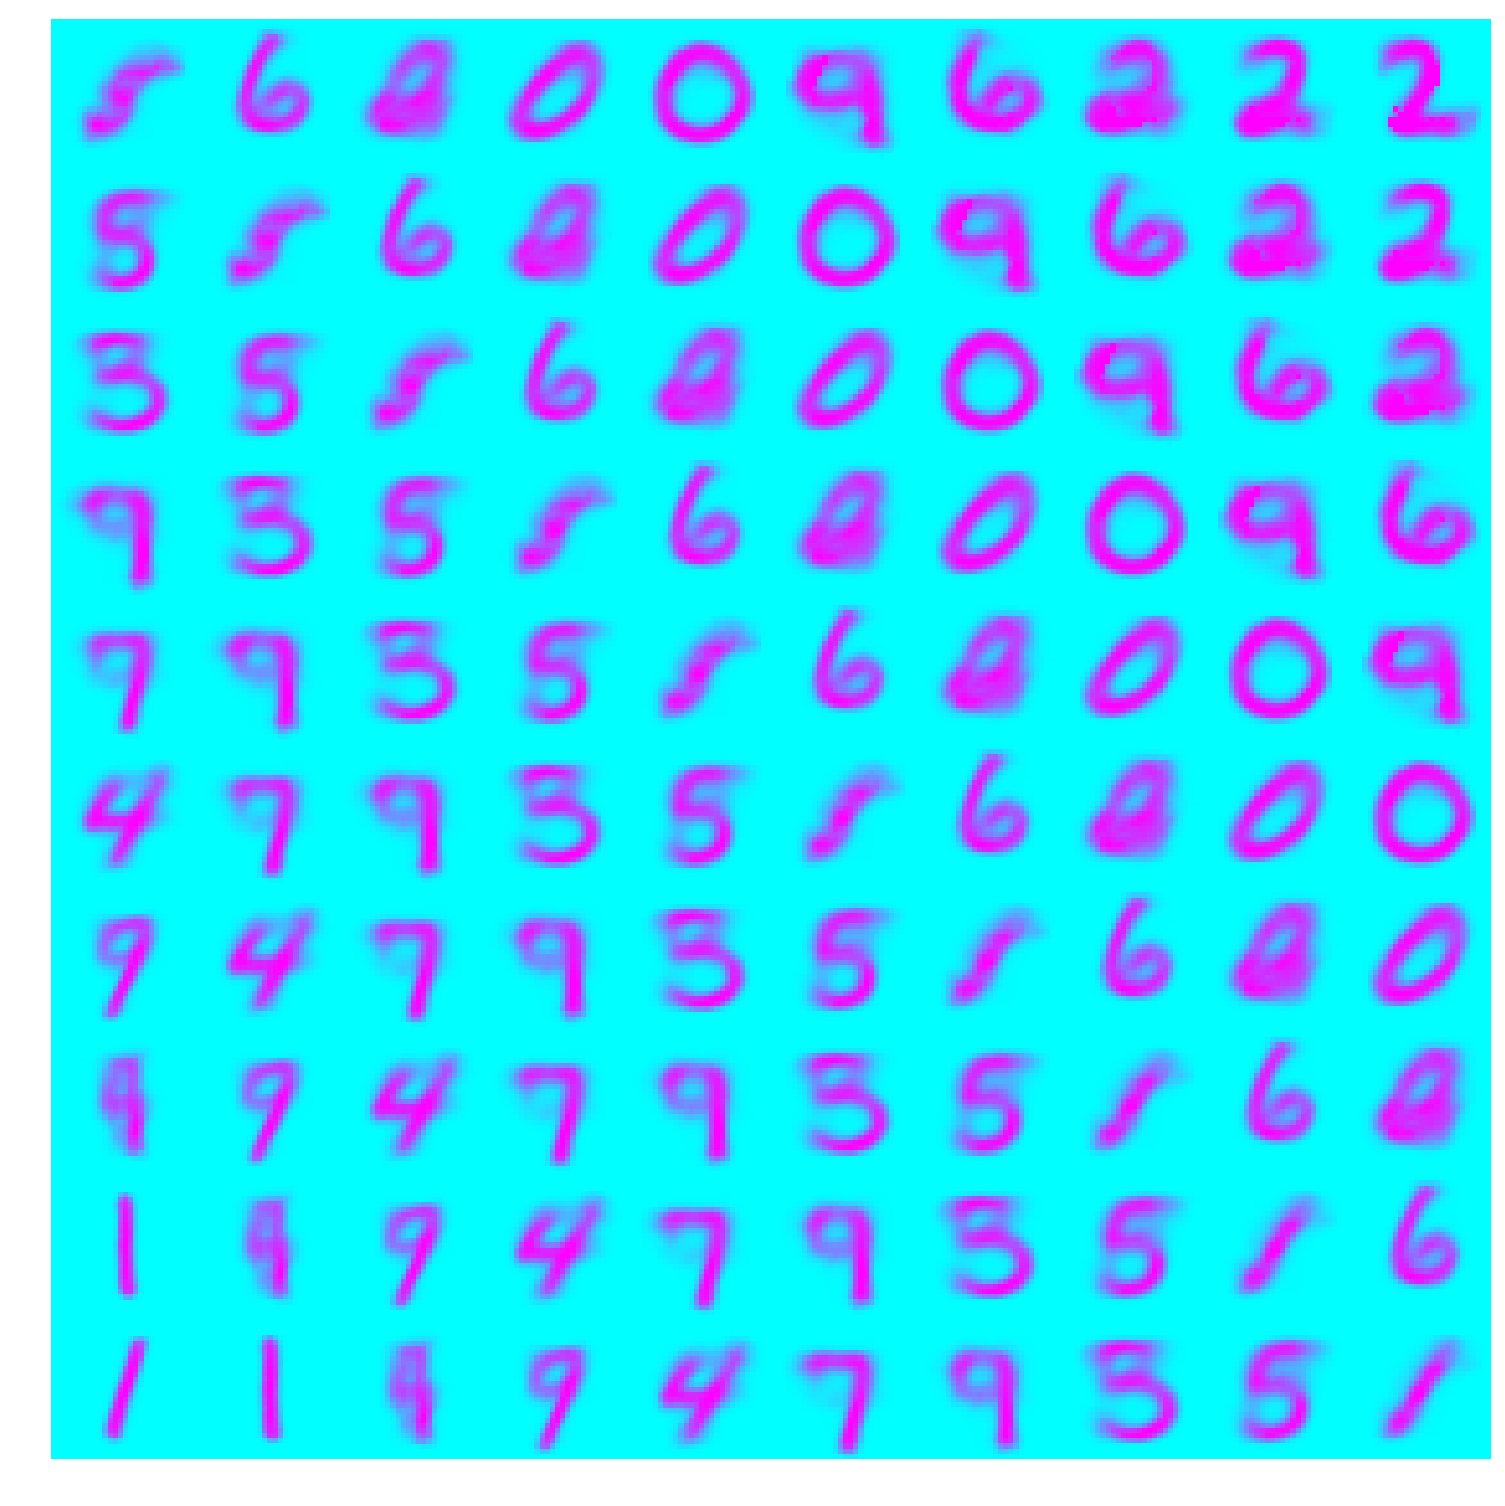

In [68]:
nrow = 10
ncol = 10

fig = plt.figure(figsize=(ncol+1, nrow+1)) 

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 

for i in range(nrow):
    for j in range(ncol):
        im = images[i][j]
        ax= plt.subplot(gs[i,j])
        ax.imshow(im, cmap='cool')
        plt.axis('off')

plt.show()

In [0]:
def get_vector(img):
    func = K.function([model.layers[0].input, K.learning_phase()],
                           [model.layers[3].output])
    return func([img.reshape(1, 28, 28, 1)])[0]
  
  
def get_vectors(imgs):
    func = K.function([model.layers[0].input, K.learning_phase()],
                           [model.layers[4].output])
    return func(imgs)[0]

In [0]:
n_points = 10000
vectors_train = get_vectors([x_train[:n_points]])

In [0]:
ys = y_train[:n_points]
# (ys==0)
colors = cm.rainbow(np.linspace(0, 1, 10))

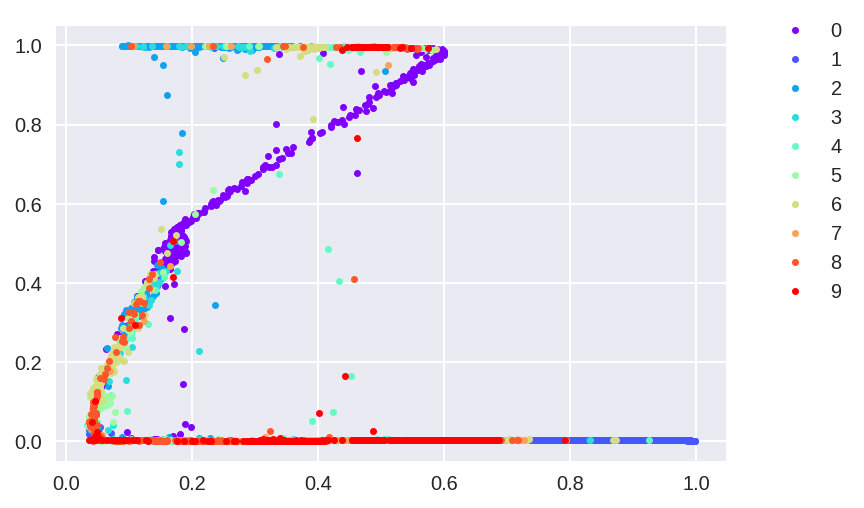

In [81]:
fig = plt.figure()
ax = plt.subplot(111)

for i in range(10):
    idx = (ys==i)
    ax.plot(vectors_train[idx,0], 
            vectors_train[idx, 1], 
            color=colors[i], 
            label=str(i), 
            linestyle='', 
            marker='.')
    
ax.legend(bbox_to_anchor=(1.2, 1.05))

plt.show()